<a href="https://colab.research.google.com/github/ruthu06/Pattern-Recognition-and-Data-Mining/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('adult.csv')



In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# 1:Train a Multinomial Naive Bayes Classifier on the entire data set but with the predictors restricted to the categorical ones. Output 4 significantly predictive features learned by the model. Report these features in your report, together with evidence that they are significantly predictive.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('adult.csv')


categorical_predictors = data.drop('income', axis=1).select_dtypes(include=['object'])


dict_vectorizer = DictVectorizer(sparse=False)
X_cat = dict_vectorizer.fit_transform(categorical_predictors.to_dict(orient='records'))


y = data['income']


X_train, X_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.5, random_state=42)


nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


feature_names = dict_vectorizer.get_feature_names_out()


feature_probabilities = nb_classifier.feature_log_prob_[1]  # Assuming '>50K' is the positive class


top_features_indices = feature_probabilities.argsort()[-4:][::-1]


top_features = [feature_names[i] for i in top_features_indices]


feature_predictiveness = [feature_probabilities[i] for i in top_features_indices]


# Print the results
print("Top 4 Predictive Features:")
for i in range(4):
    print(f"{top_features[i]} (Predictiveness: {feature_predictiveness[i]})")

# Evaluate accuracy on the test set
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on the Test Set: {accuracy}")


Top 4 Predictive Features:
native.country=United-States (Predictiveness: -2.1730136606966024)
race=White (Predictiveness: -2.1805714293514864)
marital.status=Married-civ-spouse (Predictiveness: -2.224512453639047)
sex=Male (Predictiveness: -2.2458782515509412)

Accuracy on the Test Set: 0.7878508691112339


In [ ]:
categorical_predictors

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States
...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States


# 2:Train a Gaussian Naive Bayes Classifier on the entire data set with the predictors restricted to be the numeric ones. Output the 3 most predictive features learned by the model. Notes

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest


data = pd.read_csv('adult.csv')


numeric_predictors = data.select_dtypes(include=['int64', 'float64'])


X_numeric = numeric_predictors
y = data['income']


X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


selector = SelectKBest(f_classif, k=3)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)


selected_feature_indices = selector.get_support(indices=True)


X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]


nb_classifier = GaussianNB()
nb_classifier.fit(X_train_selected, y_train)


top_features = X_numeric.columns[selected_feature_indices]


print("Top 3 Predictive Features:")
for feature in top_features:
    print(feature)


y_pred = nb_classifier.predict(X_test_selected)
accuracy = (y_pred == y_test).mean()
print(f"\nAccuracy on the Test Set: {accuracy}")


Top 3 Predictive Features:
age
education.num
hours.per.week

Accuracy on the Test Set: 0.7992752287943001


# 3: Train a Decision Tree classifier on the full data set. Print the learned tree.  Write a paragraph describing the main insights that one can glean from the learned tree

Accuracy on the Test Set: 0.852158958294945
|--- marital.status_Married-civ-spouse <= 0.50
|   |--- capital.gain <= 7073.50
|   |   |--- education.num <= 12.50
|   |   |   |--- capital.loss <= 2218.50
|   |   |   |   |--- hours.per.week <= 44.50
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- hours.per.week >  44.50
|   |   |   |   |   |--- class: <=50K
|   |   |   |--- capital.loss >  2218.50
|   |   |   |   |--- hours.per.week <= 43.00
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- hours.per.week >  43.00
|   |   |   |   |   |--- class: >50K
|   |   |--- education.num >  12.50
|   |   |   |--- age <= 31.50
|   |   |   |   |--- hours.per.week <= 44.50
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- hours.per.week >  44.50
|   |   |   |   |   |--- class: <=50K
|   |   |   |--- age >  31.50
|   |   |   |   |--- capital.loss <= 2391.50
|   |   |   |   |   |--- class: <=50K
|   |   |   |   |--- capital.loss >  2391.50
|   |   |   |   |   |--- class: >50K


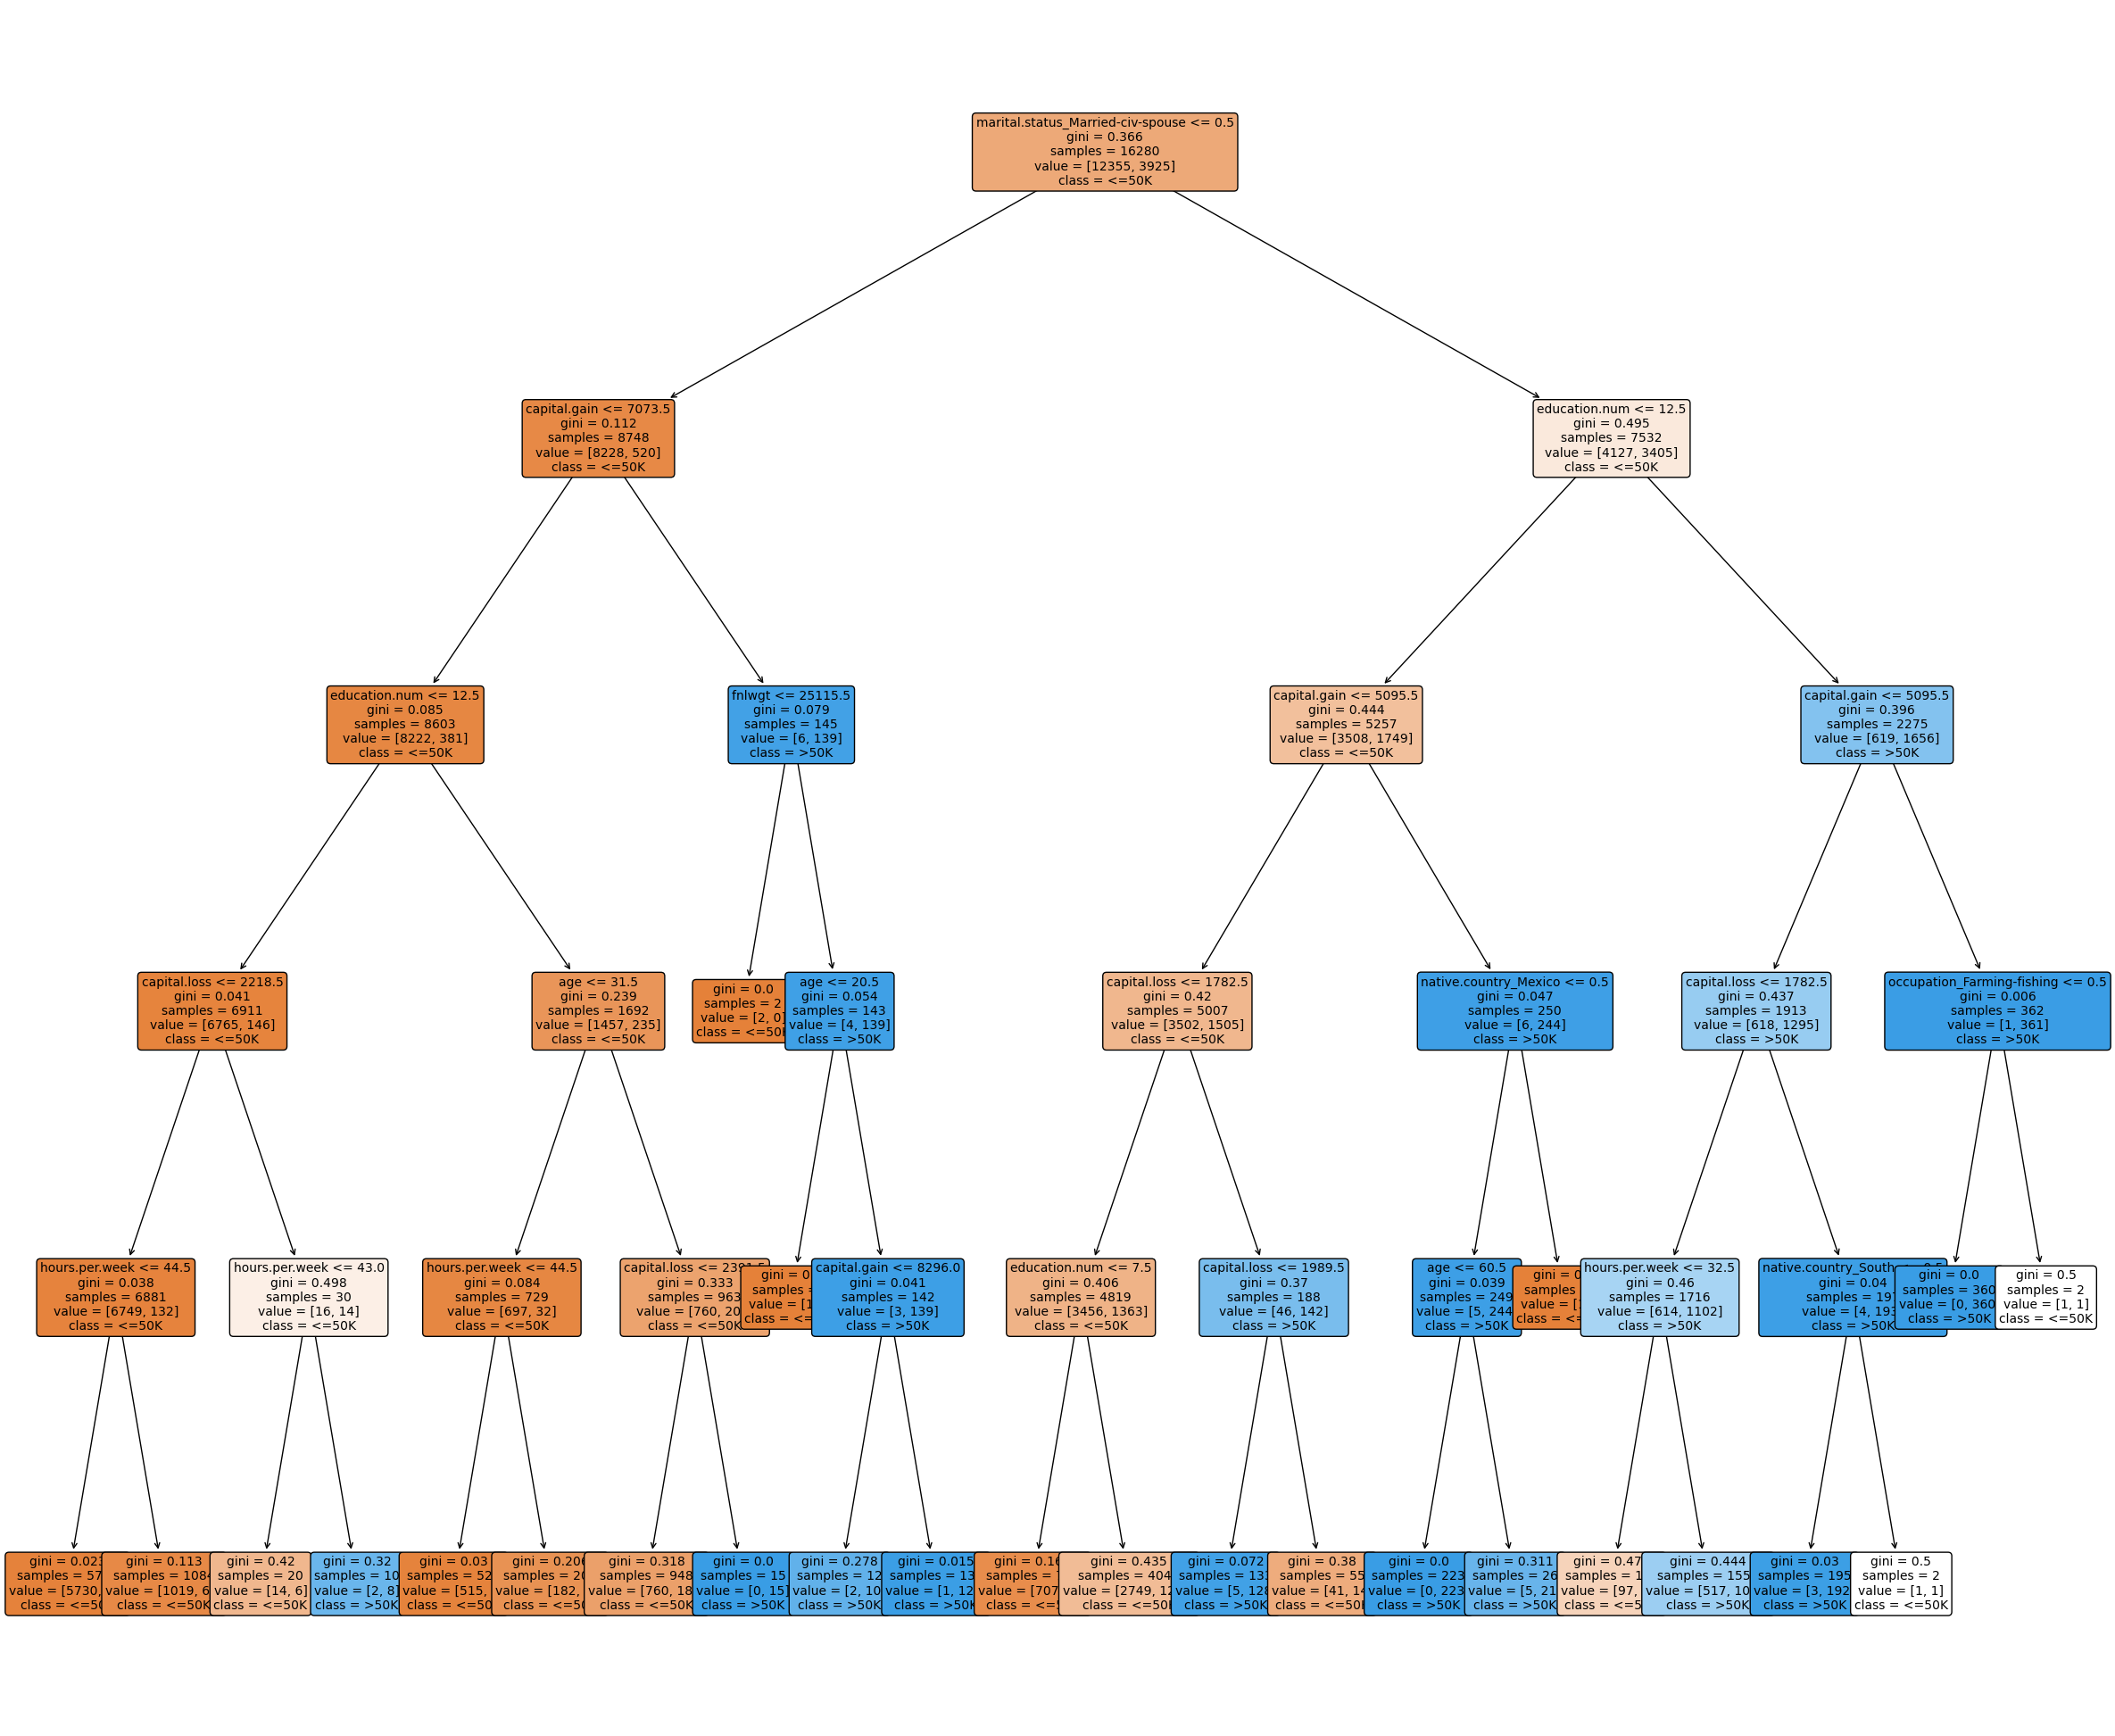

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text


data = pd.read_csv('adult.csv')


X = data.drop('income', axis=1)
y = data['income']


X_encoded = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.5, random_state=42)


tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
tree_classifier.fit(X_train, y_train)
accuracy_test = tree_classifier.score(X_test, y_test)
print(f"Accuracy on the Test Set: {accuracy_test}")

tree_text = tree_classifier.tree_
tree_text = export_text(tree_classifier, feature_names=list(X_encoded.columns))
print(tree_text)

plt.figure(figsize=(30,25))
plot_tree(tree_classifier, feature_names=X_encoded.columns, class_names=['<=50K', '>50K'], filled=True, rounded=True, fontsize=10)
plt.savefig('decision_tree.png', format='png', bbox_inches='tight')  # Save the plot as an image file
plt.show()


Insights:The first and foremost split is based on marital status, specifically whether an individual is married to a civilian spouse or not.For individuals married to a civilian spouse, the model then considers the impact of capital gain. If the capital gain is below a certain threshold, the model further evaluates education level and capital loss.The model makes distinctions based on education level and capital loss within certain ranges, indicating their significance in predicting income.Another split occurs based on age, providing additional granularity in predicting income levels.The leaf nodes represent the ultimate income classification, either less than or equal to 50K or greater than 50K.

# 4:Do a single random train-test split (50:50) of the data. Train both a Naive Bayes Classifier and a Decision Tree classifier on TRAIN. In your report, explain and describe any settings for hyperparameters you used during the various trainings. You can skip this if you used defaults in the calls to fit. Compute the ROC curves of the two classifiers on TEST, interpreting ">50K" as the positive class. Include plots of the ROC curves in your report,  together with a brief explanation of what they reveal.

Multinomial Naive Bayes AUC: 0.87
Gaussian Naive Bayes AUC: 0.83
Decision Tree AUC: 0.88


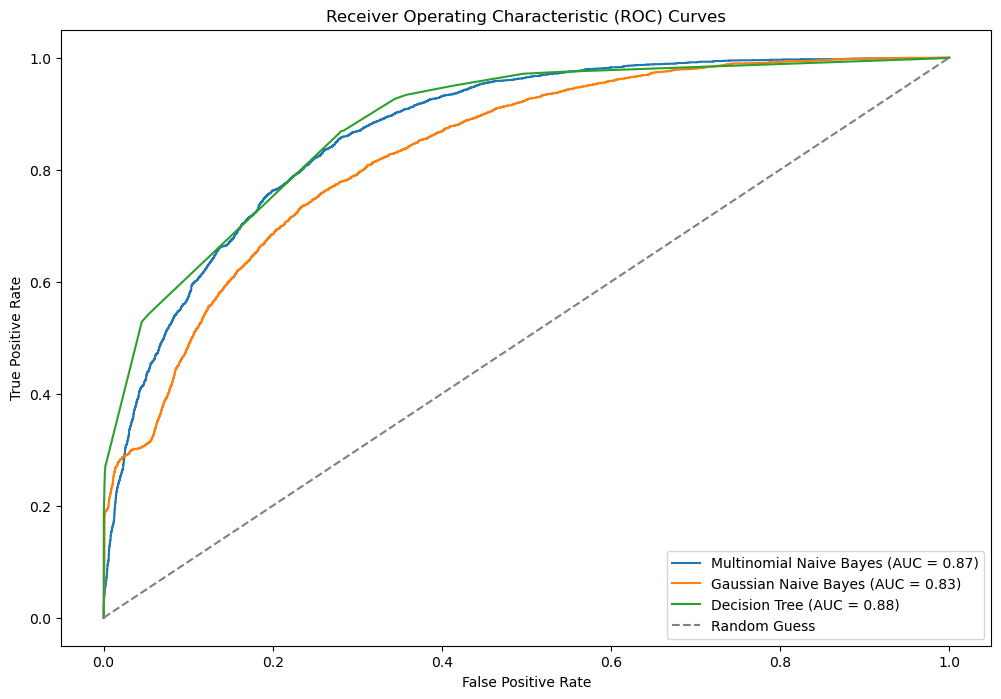

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


data = pd.read_csv('adult.csv')


X = data.drop('income', axis=1)
y = data['income']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


numeric_predictors = X.select_dtypes(include=['int64', 'float64'])
categorical_predictors = X.select_dtypes(include=['object'])


numeric_features = numeric_predictors.columns
numeric_transformer = MinMaxScaler()


categorical_features = categorical_predictors.columns
categorical_transformer = OneHotEncoder(drop='first')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


nb_multinomial = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])
nb_multinomial.fit(X_train, y_train)


numeric_transformer.fit(X_train[numeric_features])
X_train_numeric = numeric_transformer.transform(X_train[numeric_features])
nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train_numeric, y_train)


X_test_numeric = numeric_transformer.transform(X_test[numeric_features])
nb_y_pred = nb_multinomial.predict_proba(X_test)[:, 1] * nb_gaussian.predict_proba(X_test_numeric)[:, 1]


dt_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42))])
dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict_proba(X_test)[:, 1]


fpr_nb_multinomial, tpr_nb_multinomial, _ = roc_curve(y_test, nb_multinomial.predict_proba(X_test)[:, 1])
fpr_nb_gaussian, tpr_nb_gaussian, _ = roc_curve(y_test, nb_gaussian.predict_proba(X_test_numeric)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)


auc_nb_multinomial = auc(fpr_nb_multinomial, tpr_nb_multinomial)
auc_nb_gaussian = auc(fpr_nb_gaussian, tpr_nb_gaussian)
auc_dt = auc(fpr_dt, tpr_dt)


print(f'Multinomial Naive Bayes AUC: {auc_nb_multinomial:.2f}')
print(f'Gaussian Naive Bayes AUC: {auc_nb_gaussian:.2f}')
print(f'Decision Tree AUC: {auc_dt:.2f}')


plt.figure(figsize=(12, 8))
plt.plot(fpr_nb_multinomial, tpr_nb_multinomial, label=f'Multinomial Naive Bayes (AUC = {auc_nb_multinomial:.2f})')
plt.plot(fpr_nb_gaussian, tpr_nb_gaussian, label=f'Gaussian Naive Bayes (AUC = {auc_nb_gaussian:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


Insights:All three classifiers demonstrated good performance, with the Decision Tree having a slightly higher AUC. The AUC values suggest that these models can effectively discriminate between individuals with income greater than 50K and those with income less than or equal to 50K.